In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
print("All dependencies are imported.")

All dependencies are imported.


In [2]:
data = pd.read_csv('gld_price_data.csv')
df = pd.DataFrame(data)

In [3]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [8]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [9]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [24]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.80899967  82.11969966 115.95790042 127.59660081 120.7914009
 154.74199826 150.32429879 126.11410027 117.46879869 126.10480024
 116.72110102 172.28490032 141.63289783 168.12839883 115.27590011
 117.53870039 139.78340301 170.22920155 159.30240375 161.87809883
 155.09110099 125.04450008 175.43939917 157.30010362 125.25960038
  93.96910003  78.01979985 120.54360048 119.01989886 167.40060013
  88.36750036 124.94249995  91.14820073 117.6929002  121.06369932
 135.97730015 115.37590107 115.38270071 147.18069935 107.19880097
 104.50800252  87.17279803 126.56090034 118.00399994 154.66279866
 119.66060022 108.46789986 107.89729785  93.12140025 127.15319749
  74.70130041 113.73609958 121.18350009 111.29679905 118.95499885
 120.46929907 158.27970044 169.94780093 146.78989716  85.93379877
  94.1833003   86.9410988   90.87640001 118.94400077 126.39350095
 127.55090055 171.13570071 122.24169928 117.34959897  98.43570067
 168.54360126 143.11279864 132.09490306 121.09190188 120.58389965
 120.084300

In [26]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9889800783610311


In [27]:
Y_test = list(Y_test)

In [28]:
Y_test

[168.020004,
 81.230003,
 112.32,
 127.589996,
 119.620003,
 154.210007,
 148.910004,
 126.190002,
 117.470001,
 125.739998,
 115.379997,
 167.119995,
 141.630005,
 169.559998,
 115.599998,
 119.669998,
 132.949997,
 170.399994,
 159.369995,
 173.529999,
 154.720001,
 128.119995,
 177.720001,
 157.190002,
 125.309998,
 93.400002,
 76.790001,
 119.690002,
 118.989998,
 167.389999,
 87.5,
 124.980003,
 91.230003,
 115.489998,
 120.949997,
 133.809998,
 116.690002,
 113.809998,
 133.580002,
 105.970001,
 105.120003,
 87.959999,
 126.82,
 116.860001,
 159.259995,
 119.459999,
 109.160004,
 108.620003,
 93.269997,
 127.160004,
 72.260002,
 113.470001,
 119.68,
 109.139999,
 119.309998,
 120.050003,
 159.889999,
 161.490005,
 146.740005,
 85.809998,
 93.709999,
 85.550003,
 91.029999,
 118.489998,
 126.449997,
 126.980003,
 171.699997,
 122.400002,
 116.410004,
 97.959999,
 169.630005,
 142.639999,
 131.809998,
 121.360001,
 124.0,
 119.699997,
 113.889999,
 118.919998,
 105.639999,
 127.669

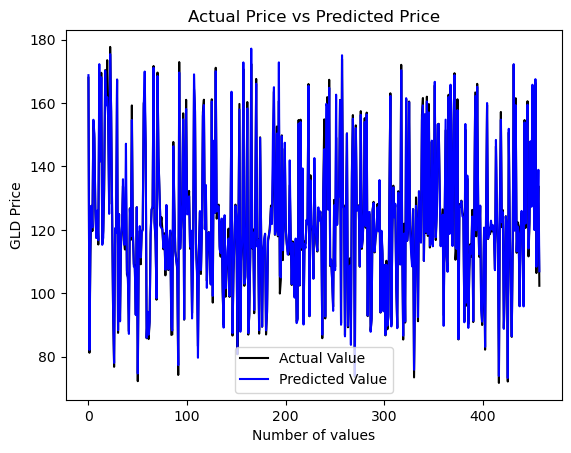

In [35]:
plt.plot(Y_test, color='black', label = 'Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()